# Sources

[Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)
[Three-dimensional Plotting in Matplotlib](https://github.com/oreillymedia/three-dimensional-plotting-in-matplotlib)

Steps count =  37


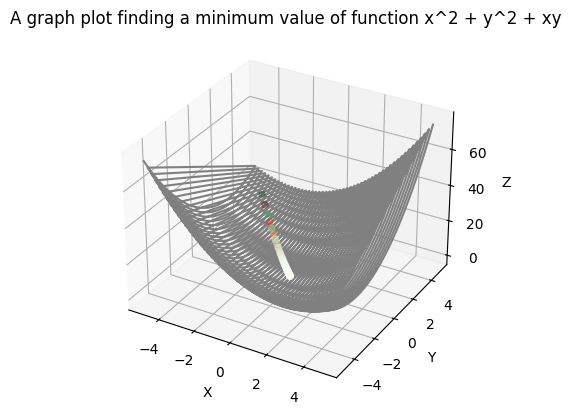

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x: float, y: float):
    return x ** 2 + y ** 2 + x * y

# partial derivative on x axis
# gradient is a slope of a curve at a given point in a specified direction
def gradient_x(x: float, y: float):
    return 2 * x + y

# partial derivative on x axis
# gradient is a slope of a curve at a given point in a specified direction
def gradient_y(x: float, y: float):
    return 2 * y + x

# maxLoops: maximum number of iterations
# initialPoint: a starting point to start the algorithm
# learnRate: a scaling factor for step sizes
# tolerance: the condition to stop the algorithm
def gradientDescentAlgorithm(maxLoops: int, initialPoint: (float, float), learnRate: float, tolerance: float):

    # choose a starting point
    x, y = initialPoint
    steps = [initialPoint] # history tracking

    # loop until the maximum number of iterations is still not reached
    for _ in range(maxLoops):

        # calculate gradient at this point is a vector of multiple partial derivatives
        # calculate the step size
        diff_x = learnRate * gradient_x(x, y)
        diff_y = learnRate * gradient_y(x, y)        

        # continue if the step size is still tolerated
        if np.abs(diff_x) < tolerance or np.abs(diff_y) < tolerance:            
            break

        # make a scaled step in the opposite direction to the gradient
        # objective is to minimize
        x -= diff_x
        y -= diff_y

        # store the next point in the history
        steps.append((x,y))

    print("Steps count = ", len(steps))
    return steps, (x, y)

def scatter(ax, steps):
    xs = []
    ys = []
    zs = []
    for step in steps:
        xs.append(step[0])
        ys.append(step[1])
        zs.append(func(step[0], step[1]))

    #ax.scatter3D(xs, ys, zs, c=zs, cmap='Greens')
    ax.scatter3D(xs[::2], ys[::2], zs[::2], c=zs[::2], cmap='Greens') # odd indexes
    ax.scatter3D(xs[1::2], ys[1::2], zs[1::2], c=zs[1::2], cmap='Reds') # even indexes

def plot(ax, start_x, end_x, step_x, start_y, end_y, step_y):
    xs = []
    for x in np.arange(start_x, end_x+step_x, step_x):
        xs.append(x)

    ys = []
    for y in np.arange(start_y, end_y+step_y, step_y):
        ys.append(y)
        
    coords = []
    for x in xs:
        for y in ys:
            z = func(x, y)
            coords.append((x, y, z))
    
    xs = []
    ys = []
    zs = []
    for coord in coords:
        xs.append(coord[0])
        ys.append(coord[1])
        zs.append(coord[2])
    
    ax.plot3D(xs, ys, zs, 'gray')    

def show(steps):

    # set up
    fig = plt.figure()
    ax = plt.axes(projection='3d')    

    # draw gradient descent points
    scatter(ax, steps)
    
    # draw the graph of function in range [-1, 2.5]
    plot(ax, -5, 5, 0.2, -5, 5, 0.2)

    # add labels and a title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('A graph plot finding a minimum value of function x^2 + y^2 + xy')    

    # draw the plot
    plt.show()


# MAIN PROGRAM
    
## try to escape from the saddle point
steps, _ = gradientDescentAlgorithm(1000, (-4, 4), 0.1, 0.01)
show(steps)




